In [342]:
import pandas as pd
import numpy as np

true_news = pd.read_csv('true.csv')
fake_news = pd.read_csv('fake.csv')
true_news['label'] = 'true'  # add an extra column (named "label") to the true_news dataframe and assign true to all row in this column
fake_news['label'] = 'fake' # add an extra column (named "label") to the fake_news dataframe and assign fake to all row in this column

#compare the labels to see if the data is balanced
print(true_news['label'].value_counts())
print(fake_news['label'].value_counts())

#randomly remove (n = 2064) rows from the fake_news data frame to balance the labels
np.random.seed(5) #you can also use np.random.seed(1) This displays the same random numbers. 
fake_news = fake_news.drop(np.random.choice(fake_news.index, 2064, replace=False))

#compare the labels to see if the data is balanced
print(true_news['label'].value_counts())
print(fake_news['label'].value_counts())

news_data = pd.concat([true_news,fake_news]) # concatenate the fake_news and true_news dataframe 
news_data

true    21417
Name: label, dtype: int64
fake    23481
Name: label, dtype: int64
true    21417
Name: label, dtype: int64
fake    21417
Name: label, dtype: int64


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [343]:
from sklearn.preprocessing import LabelEncoder
news_data['target'] = LabelEncoder().fit_transform(news_data['label'])  # add an extra column (named "target") which is a transformation of the "label" column from text (true or fake) to numbers (1 or 0) using Labelencoder, fit_transform method
news_data

,title,text,subject,date,label,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true,1
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,0


In [344]:
news_data['text'] = news_data['title'] + news_data['text'] # merge the "title" and "text" to replace the "text" column
news_data = news_data[['text','target']] #isolate the merged "text" and the "target" column
news_data

,text,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [345]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#this would act on every text in each row (pre-processing the text)
def data_cleaning(text):
    text = text.lower() # to convert the text to lowercase
    text = re.sub('[^a-zA-Z]', ' ',text) # to remove number and special characters 
    text = text.split()  #to tokenize the text
    text = [wnl.lemmatize(word) for word in text if not word in stop_words] #to lemmatize and remove stopwords
    text = [word for word in text if len(word) >=3] #remove 3 or less characters; only keep words of length greater than 3
    text = ' '.join(text) #to join all tokenized words
    return text
    
news_data['text'] = news_data['text'].apply(lambda x: data_cleaning(x))  # apply this to every row in the text column
news_data


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12255\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12255\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-345-54771d3af6c3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['text'] = news_data['text'].apply(lambda x: data_cleaning(x))  # apply this to every row in the text column


,text,target
0,budget fight loom republican flip fiscal scrip...,1
1,military accept transgender recruit monday pen...,1
2,senior republican senator let mueller job wash...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump want postal service charge much amazon s...,1
...,...,...
23476,mcpain john mccain furious iran treated sailor...,0
23477,justice yahoo settle mail privacy class action...,0
23478,sunnistan allied safe zone plan take territori...,0
23479,blow million jazeera america finally call quit...,0


In [346]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X = news_data.iloc[:, 0]
y = news_data.iloc[:, 1]
train_data, test_data, train_target, test_target = train_test_split(X, y, random_state = 5, train_size = 0.80) #here you can set random state to 0,1,5 etc. you will have same result for each run. However, setting this to 'None' would yield different results.

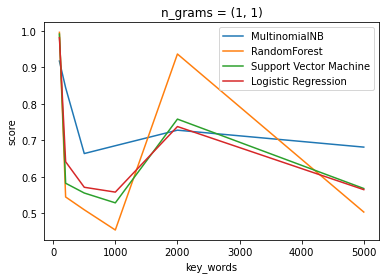

               Classifier  Average_Run_Time
0           MultinomialNB          0.138105
1  RandomForestClassifier         29.501433
2                     SVM        664.366449
3      LogisticRegression          2.128696


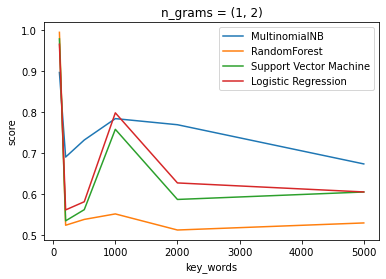

               Classifier  Average_Run_Time
0           MultinomialNB          0.135143
1  RandomForestClassifier         29.764126
2                     SVM        633.326938
3      LogisticRegression          1.802570


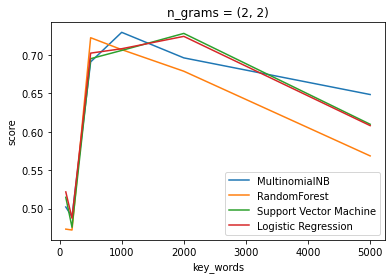

               Classifier  Average_Run_Time
0           MultinomialNB          0.148823
1  RandomForestClassifier         60.192952
2                     SVM       1026.809542
3      LogisticRegression          2.416460


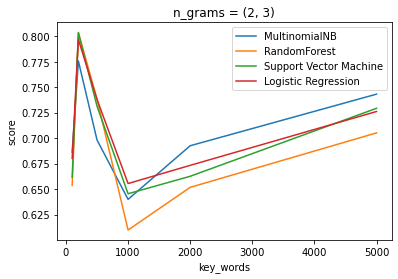

               Classifier  Average_Run_Time
0           MultinomialNB          0.143624
1  RandomForestClassifier         56.538523
2                     SVM        774.377116
3      LogisticRegression          2.388715


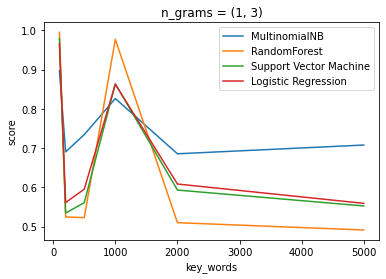

               Classifier  Average_Run_Time
0           MultinomialNB          0.133667
1  RandomForestClassifier         28.103277
2                     SVM        601.524018
3      LogisticRegression          1.805785


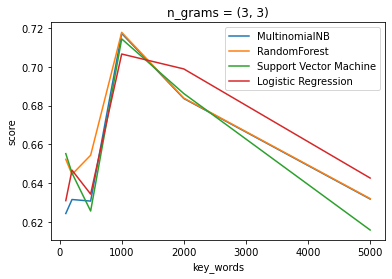

               Classifier  Average_Run_Time
0           MultinomialNB          0.194189
1  RandomForestClassifier        149.441923
2                     SVM       1278.565550
3      LogisticRegression          2.455376


In [347]:
# Feature Extraction and Text Embedding
# Optimizing feature selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import time

key_words = [100, 200, 500, 1000, 2000, 5000]
n_grams = [(1,1),(1,2),(2,2),(2,3),(1,3),(3,3)] 

for ng in n_grams:
    
    #to store the score on test samples for each model
    score_MNB = []
    score_RFC = []
    score_SVC = []
    score_LRC = []
    
    #to store time taken to run each model
    MNB_time = []
    RFC_time = []
    SVC_time = []
    LRC_time = []  
        
    for kw in key_words:
        vectorizer = TfidfVectorizer(max_features = kw,lowercase = False, ngram_range = ng)
        vec_train_data = vectorizer.fit_transform(train_data).toarray()
        vec_test_data = vectorizer.fit_transform(test_data).toarray()
        
        def get_score(model, vec_train_data, vec_test_data, train_target, test_target): # a function which takes the classifer model, trains the model, and outputs the score on test data
            model.fit(vec_train_data,train_target)
            return model.score(vec_test_data,test_target)
         
        start_time = time.time()
        sample_score_MNB = get_score(MultinomialNB(), vec_train_data, vec_test_data, train_target, test_target)
        score_MNB = np.append(score_MNB, np.array([sample_score_MNB]), axis=0)
        current_time = time.time()
        MNB_time = np.append(MNB_time, np.array([current_time - start_time]), axis=0)
        
        start_time = time.time()
        sample_score_RFC = get_score(RandomForestClassifier(), vec_train_data, vec_test_data, train_target, test_target)
        score_RFC = np.append(score_RFC, np.array([sample_score_RFC]), axis=0)
        current_time = time.time()
        RFC_time = np.append(RFC_time, np.array([current_time - start_time]), axis=0)
        
        start_time = time.time()
        sample_score_SVC = get_score(SVC(), vec_train_data, vec_test_data, train_target, test_target)
        score_SVC = np.append(score_SVC, np.array([sample_score_SVC]), axis=0)
        current_time = time.time()
        SVC_time = np.append(SVC_time, np.array([current_time - start_time]), axis=0)
        
        start_time = time.time()
        sample_score_LRC = get_score(LogisticRegression(), vec_train_data, vec_test_data, train_target, test_target)
        score_LRC = np.append(score_LRC, np.array([sample_score_LRC]), axis=0)
        current_time = time.time()
        LRC_time = np.append(LRC_time, np.array([current_time - start_time]), axis=0)
        
    plt.plot(key_words, score_MNB, label = 'MultinomialNB')
    plt.plot(key_words, score_RFC, label = 'RandomForest')
    plt.plot(key_words, score_SVC, label = 'Support Vector Machine')
    plt.plot(key_words, score_LRC, label = 'Logistic Regression')   
    plt.title(f"n_grams = {ng}")  
    plt.xlabel("key_words")
    plt.ylabel('score')
    if ng == (2,2):             # to shift the legend for this particlar instance to the bottom right to avoid crossing the plots
        plt.legend(loc="lower right")
    else:
        plt.legend(loc="upper right")
    plt.show()
    
    #to represent the run time in a dataframe
    model_time = [('MultinomialNB',np.average(MNB_time)), ('RandomForestClassifier', np.average(RFC_time)), ('SVM', np.average(SVC_time)), ('LogisticRegression', np.average(LRC_time))]
    Run_time = pd.DataFrame(model_time, columns=["Classifier",'Average_Run_Time'])
    print(Run_time)